In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from physynthtrainer.utils import paint_arr_to_jpg
from ultralytics import YOLO
from astropy.io import fits# log scale
from matplotlib.colors import LogNorm
from skimage.transform import resize

%load_ext autoreload
%autoreload 2


In [36]:
model_path = '/home/peijin/SunSpecStreamSys/model/last.v11.pt'

In [37]:

model = YOLO(model_path)

In [38]:
data_fits = "/nas7a/beam/fits_v1/fits/2025/ovro-lwa.lev1_bmf_256ms_96kHz.2025-09-29.dspec_I.fits"

In [39]:

data = fits.getdata(data_fits)

print(data.shape)

(1, 1, 731, 136684)


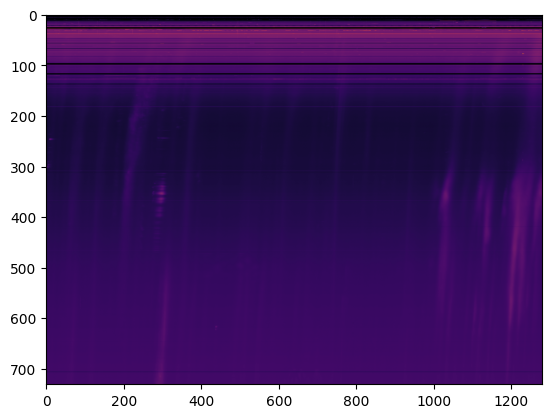

In [48]:


starting_idx = 50000
duration = 640*2

plt.imshow(data[0,0,:,starting_idx:starting_idx+duration], 
norm=LogNorm(vmax=300, vmin=0.4) ,cmap='inferno', aspect='auto')



In [51]:
out_size = (640,640)
data_out = resize(data[0,0,:,starting_idx:starting_idx+duration], out_size, anti_aliasing=True)


paint_arr_to_jpg(data_out.T, vmax=100, vmin=0.5, scaling='log')

In [52]:
results = model.predict(
    source="test.jpg",  # can be folder, image, or video
    save=True,         # save annotated images/videos
    save_txt=True,     # save YOLO-format .txt files
    save_conf=True,    # include confidence in .txt
    conf=0.8          # confidence threshold
)

image 1/1 /home/peijin/PhySynthTrainer/example/test.jpg: 640x640 6 t3s, 2 t3bs, 113.0ms
Speed: 1.5ms preprocess, 113.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /home/peijin/PhySynthTrainer/example/runs/detect/predict2
1 label saved to /home/peijin/PhySynthTrainer/example/runs/detect/predict2/labels
